## Cookies

We enter the prompt snickerdoodle and then we get the confirmation. After that we inspect the cookies with our browser inspector and see that the value set from the single cookie which is called "name" is 0. We try different values:
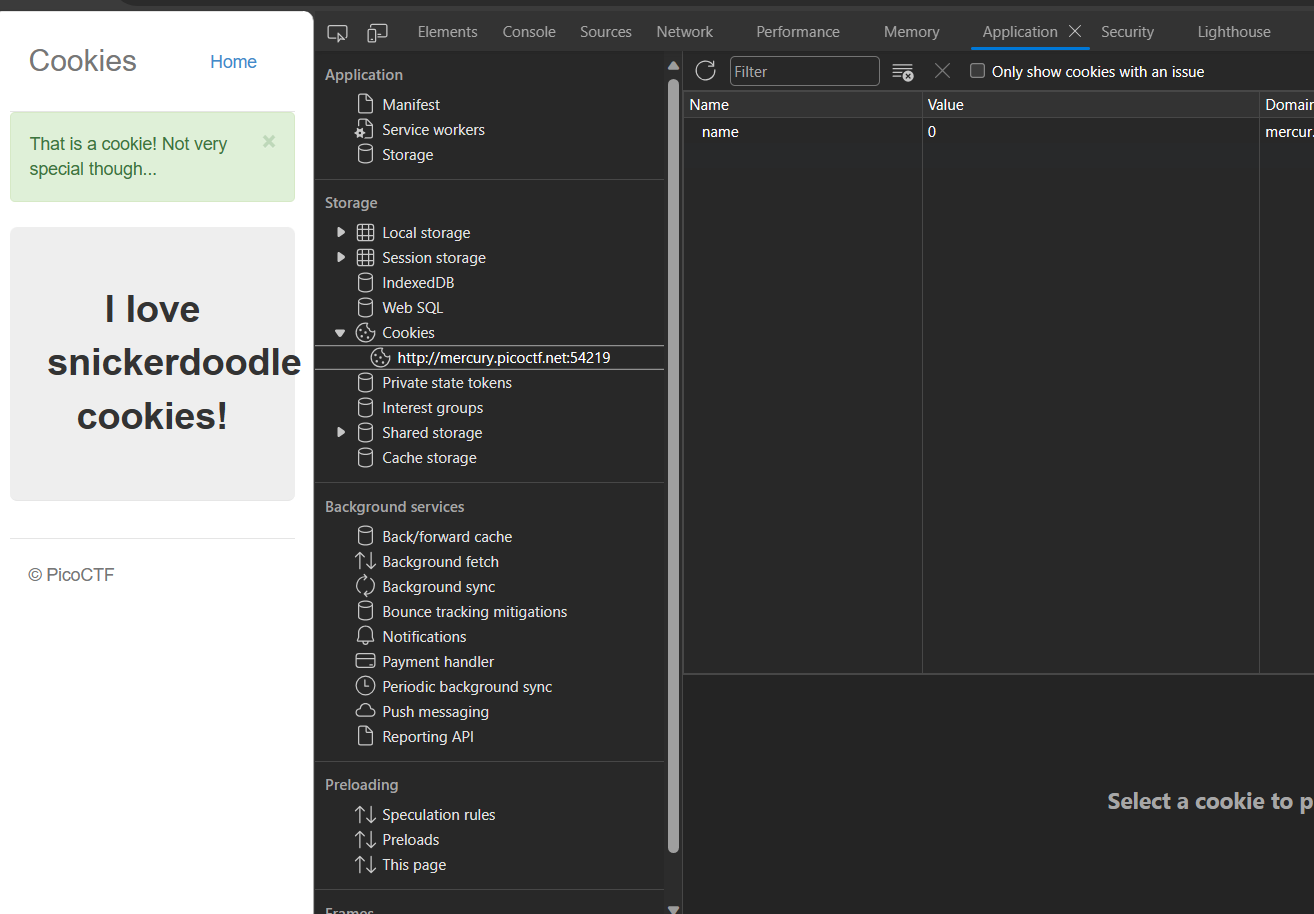

After trying many different values and reloading the webpage seeing diferent kinds of cookies (oatmeal raisin). We cannot use negative values, so we try numbers one by one. When reaching number 18. We obtain the flag as the site reloads: 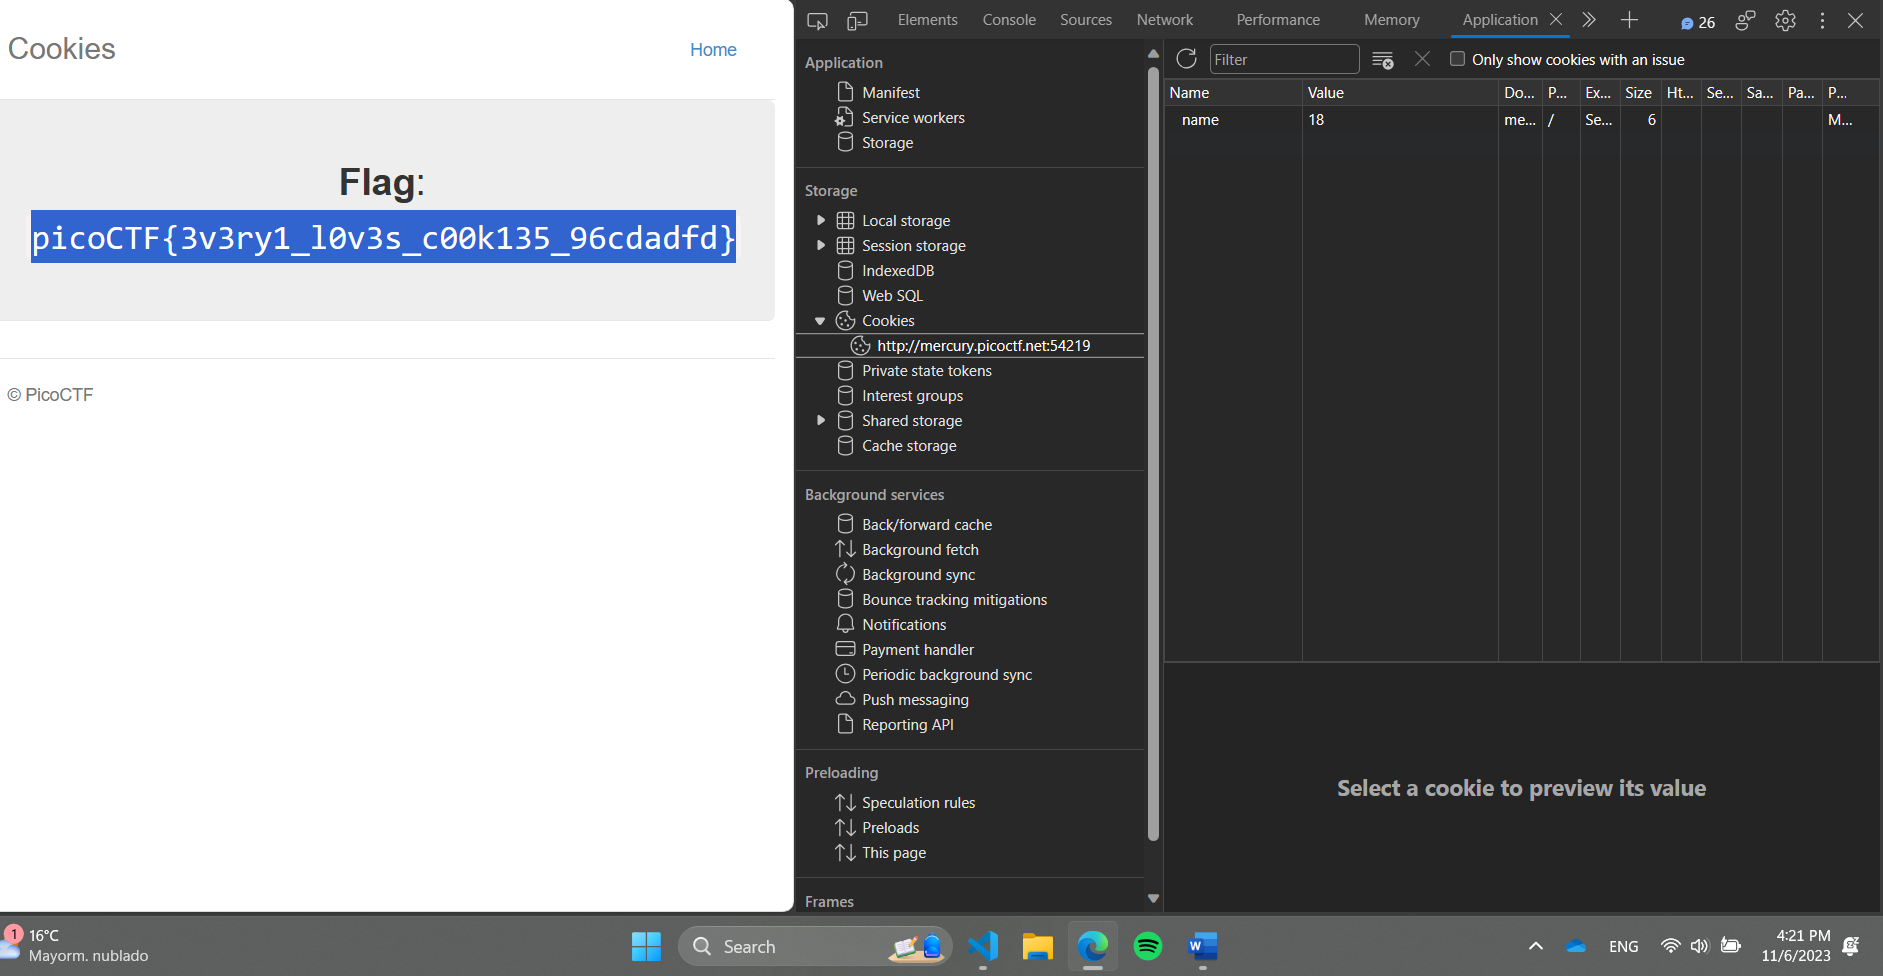

## Scavenger Hunt

The first step involves using ctrl+I to inspect the HTML. Then you can click on the links to the myjs.js and mycss.cs to inspect the CSS and JS files in order to know more about the page. You obtain the first part of the key on the HTML file as a comment. You also obtain the second part of the key within the CSS file:

![HTML Inspection](ScavengerHTMLInspection.png "HTML Inspection ")

![CSS Inspection](ScavengerCSSInspection.png "CSS Inspection ")

After inspecting the HTML and CSS files, you proceed to the JS file and we get a clue:

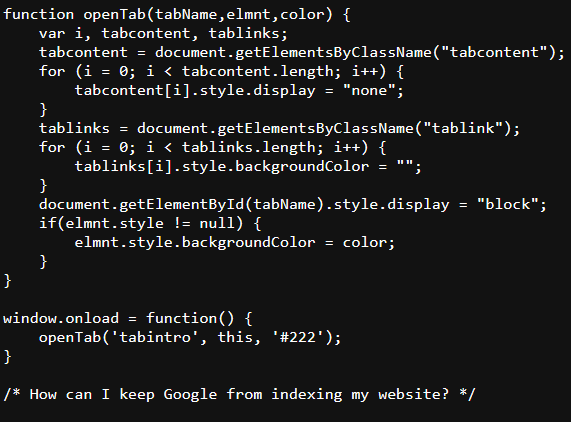

By searching in Google: How can I keep Google from indexing my website? We obtain the following answer, there is also a robots.txt that avoids web crawlers:
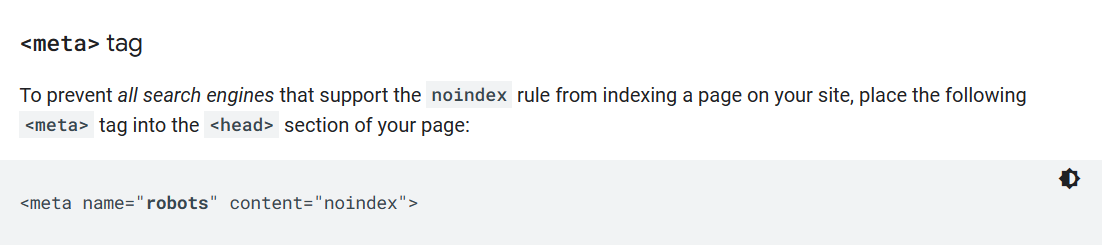

We proceed to use: http://mercury.picoctf.net:5080/robots.txt, by following the clue and we obtain the third part of the flag: 
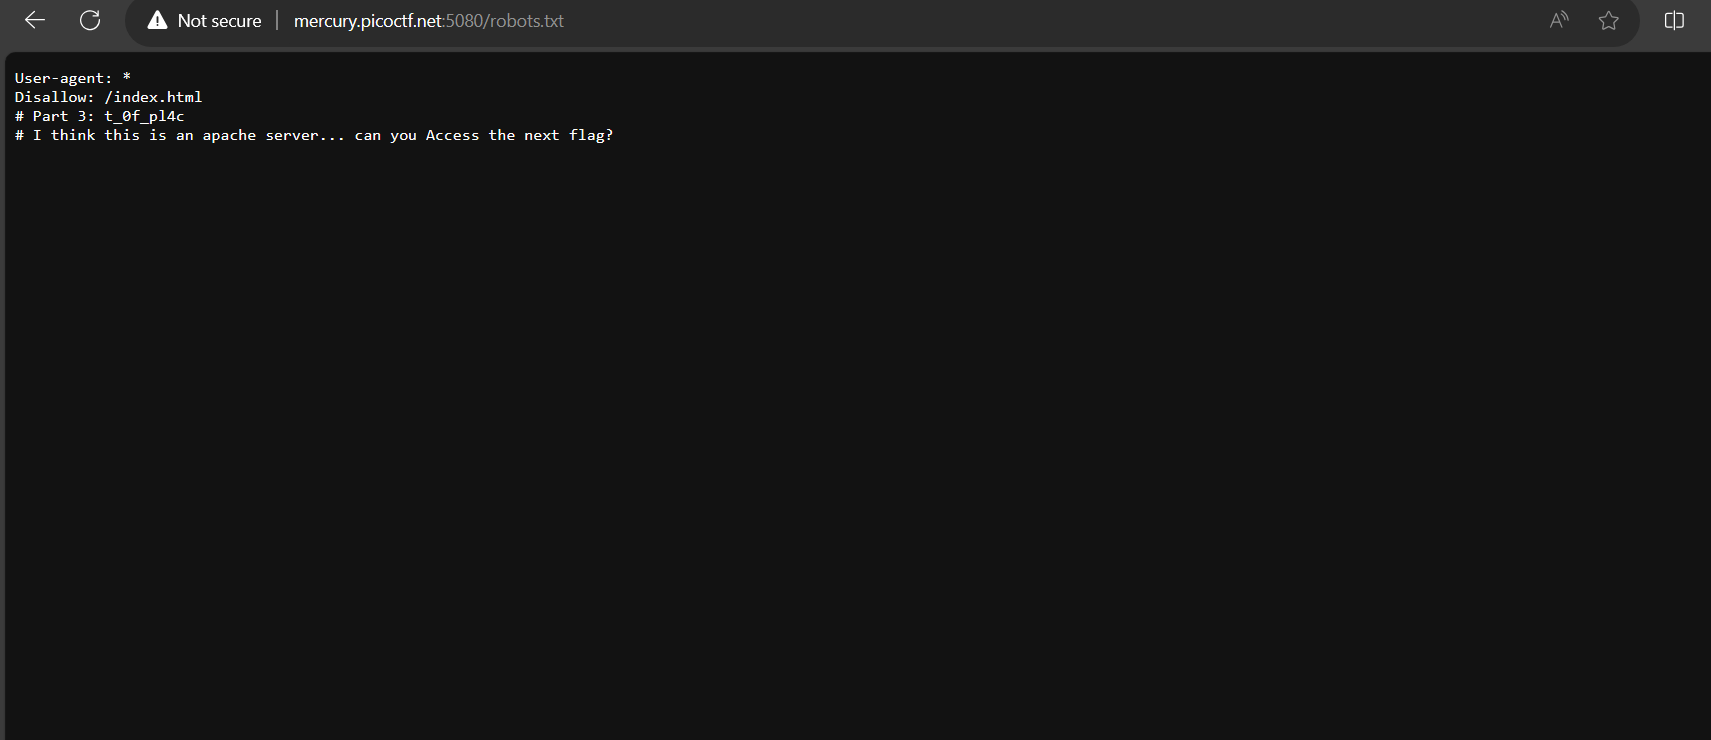

By searching for how to enable Apache server access on a website on Google we obtain the following hint: 
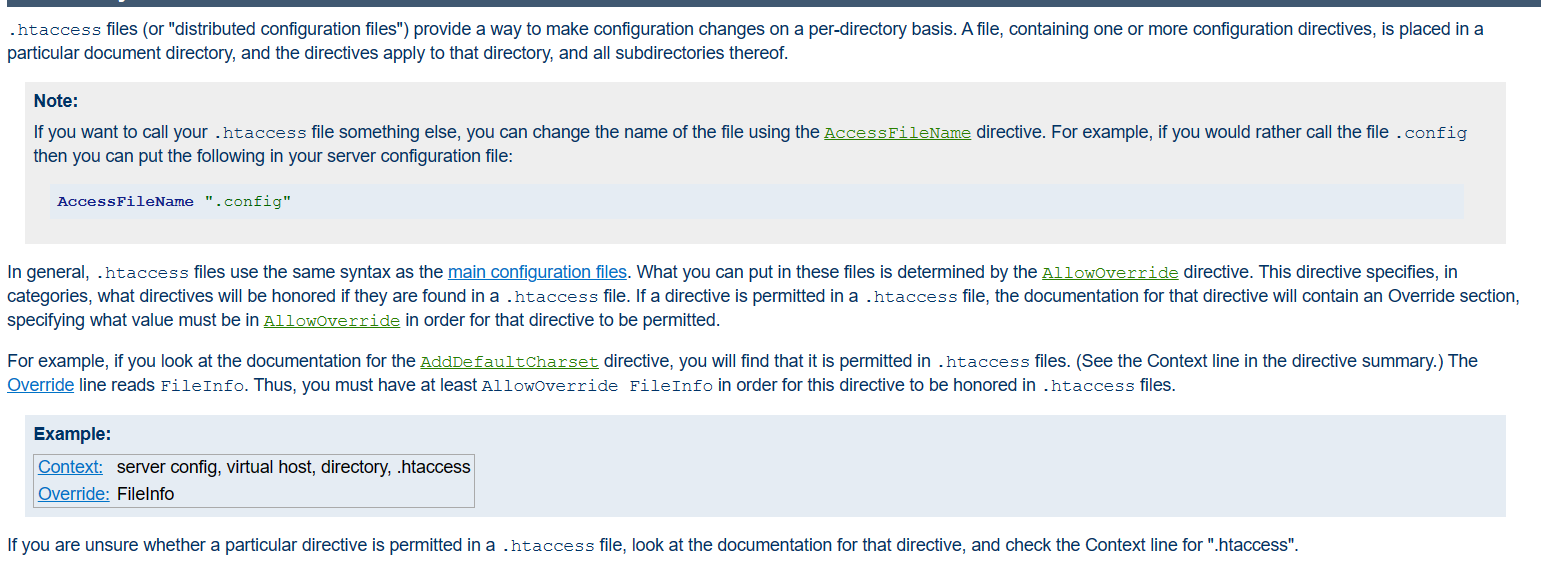

We obtain the 4th part of the cipher by accesing the .htaccess file through the link http://mercury.picoctf.net:5080/.htaccess:
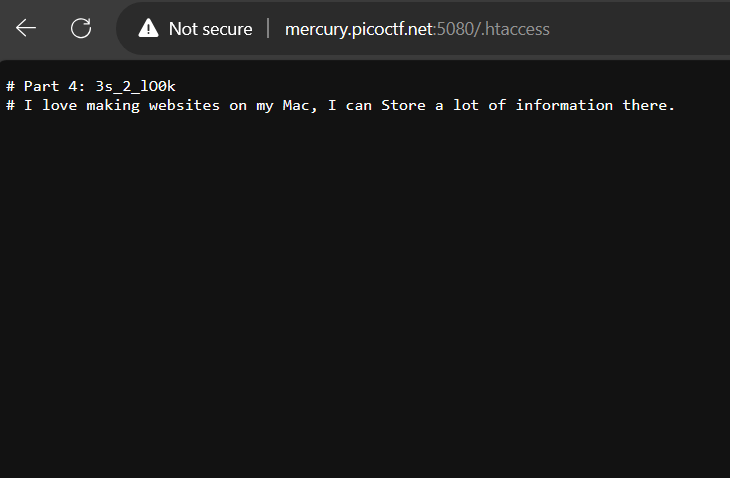

By googling the following information on how to store website information files we obtain that DS._Store is a directory that enables that: 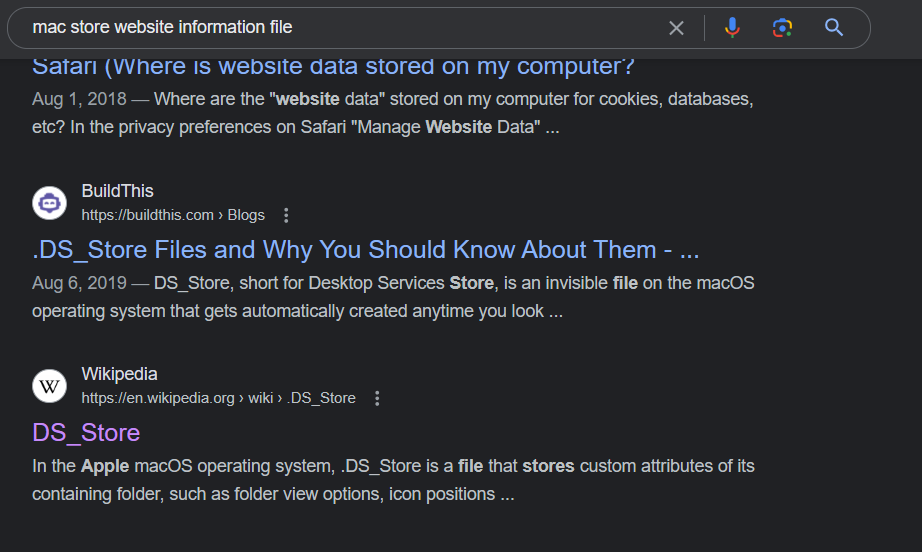

Finally we use the link and input DS_Store in the webpage in order to obtain the final part of the flag: 
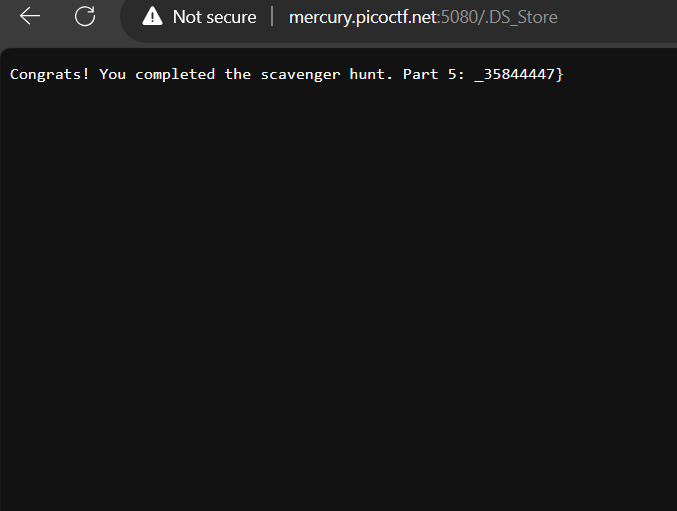

## findme

After launching the instance of the website, and knowing that the hint is to lookout for redirects we proceed to use the dev tools in the browser through the network tools to obtain a log of possible redirects. After using the test username and test! password the log list is filled with two entries of redirects: 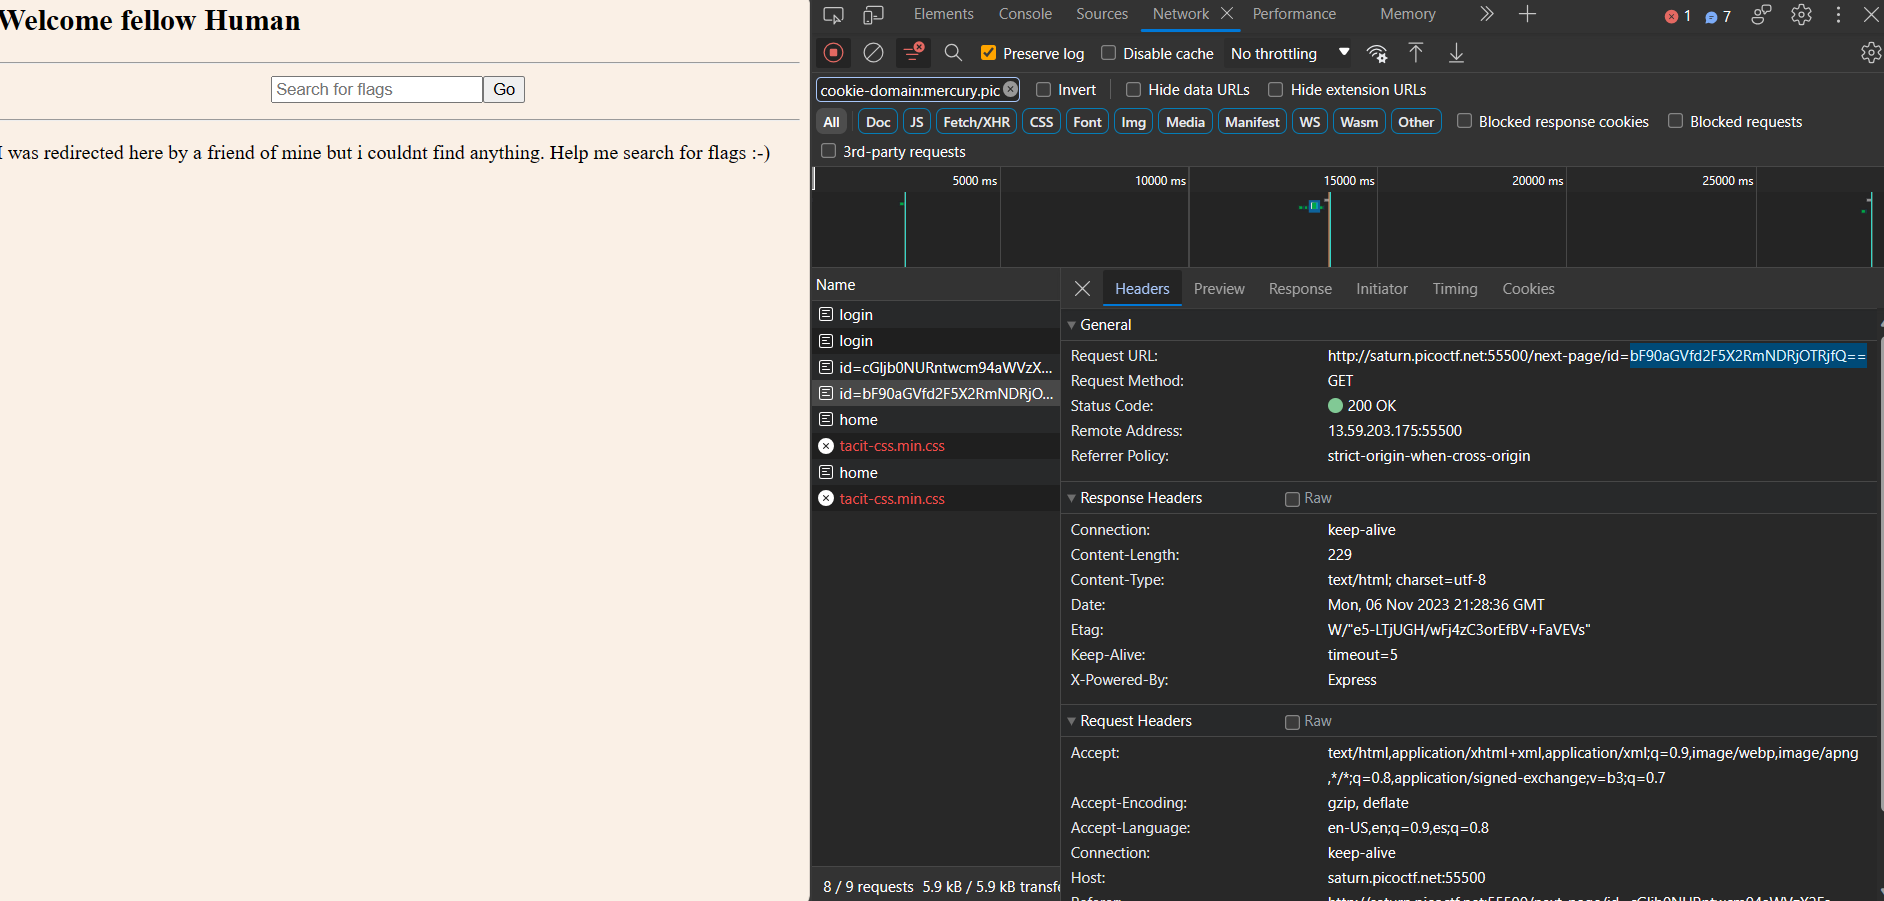

We know that the flag is hidden within the url id= which is somehow decoded. We figure out that the text in ciphered in base 64 by looking at the end of each text, which has the characters ==, this forms a padding so that the text can be a multiple of 4. We make a simple code that decodes base 64 and obtain the flag:

In [2]:
import base64

def decode_base64(encoded_text):
    try:
        # Decoding the Base64-encoded string
        decoded_bytes = base64.b64decode(encoded_text)
        
        # Converting the bytes to a UTF-8 encoded string
        decoded_text = decoded_bytes.decode('utf-8')
        
        return decoded_text
    except Exception as e:
        return f"Error decoding Base64: {e}"

# Example usage
encoded_text = "cGljb0NURntwcm94aWVzX2Fs"
encoded_text_2="bF90aGVfd2F5X2RmNDRjOTRjfQ=="
decoded_text = decode_base64(encoded_text)
decoded_text_2 = decode_base64(encoded_text_2)

print(f"Encoded Text part (1): {encoded_text}")
print(f"Decoded Text: {decoded_text}")
print(f"Encoded Text part (2): {encoded_text_2}")
print(f"Decoded Text: {decoded_text_2}")


Encoded Text part (1): cGljb0NURntwcm94aWVzX2Fs
Decoded Text: picoCTF{proxies_al
Encoded Text part (2): bF90aGVfd2F5X2RmNDRjOTRjfQ==
Decoded Text: l_the_way_df44c94c}


## Inspect HTML

Simple exercise, as the title states, the only thing you have to do is inspect the HTML with your browser and you will get the flag in the HTML comments: 
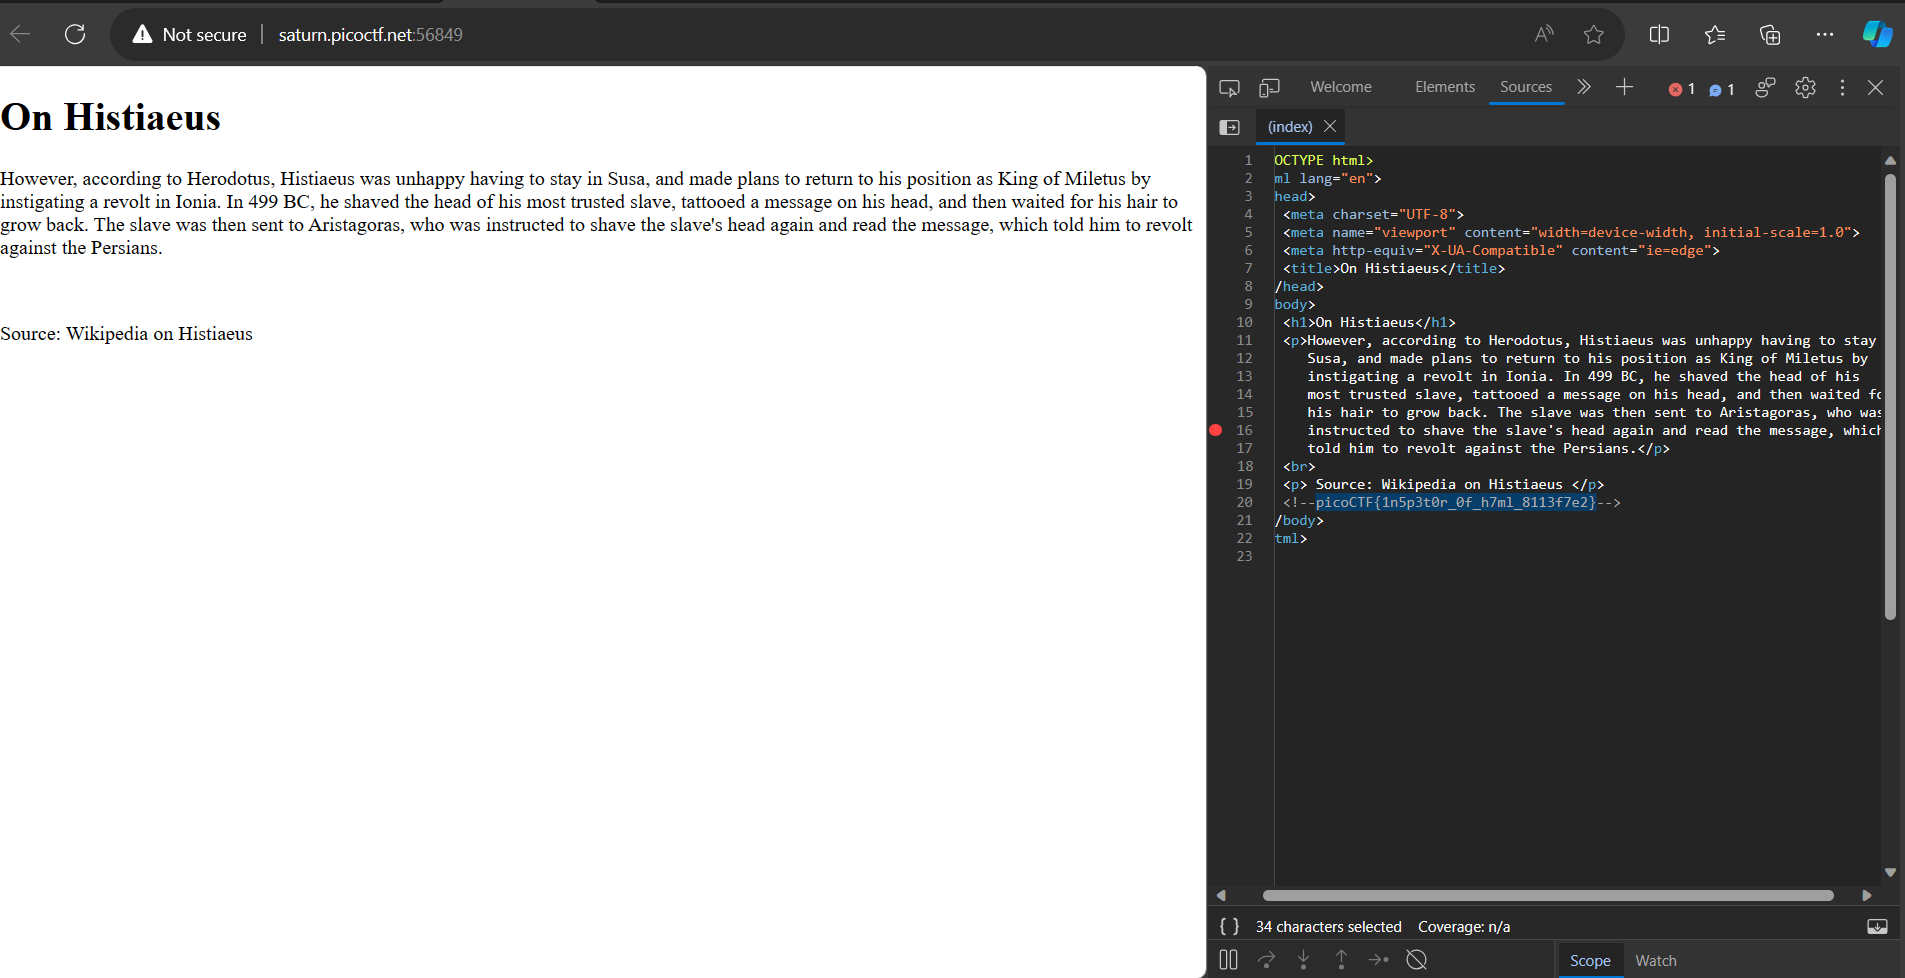

## Local Authority

You are redirected to a login page which by inspection doesnt have anything out of the ordinary. You try to log in with any username and password and it redirects you to a login failed page. After that, you inspect the failed login page and you can see that there is a secure.js file. You can obtain the right credentials by checking the function on the js file:
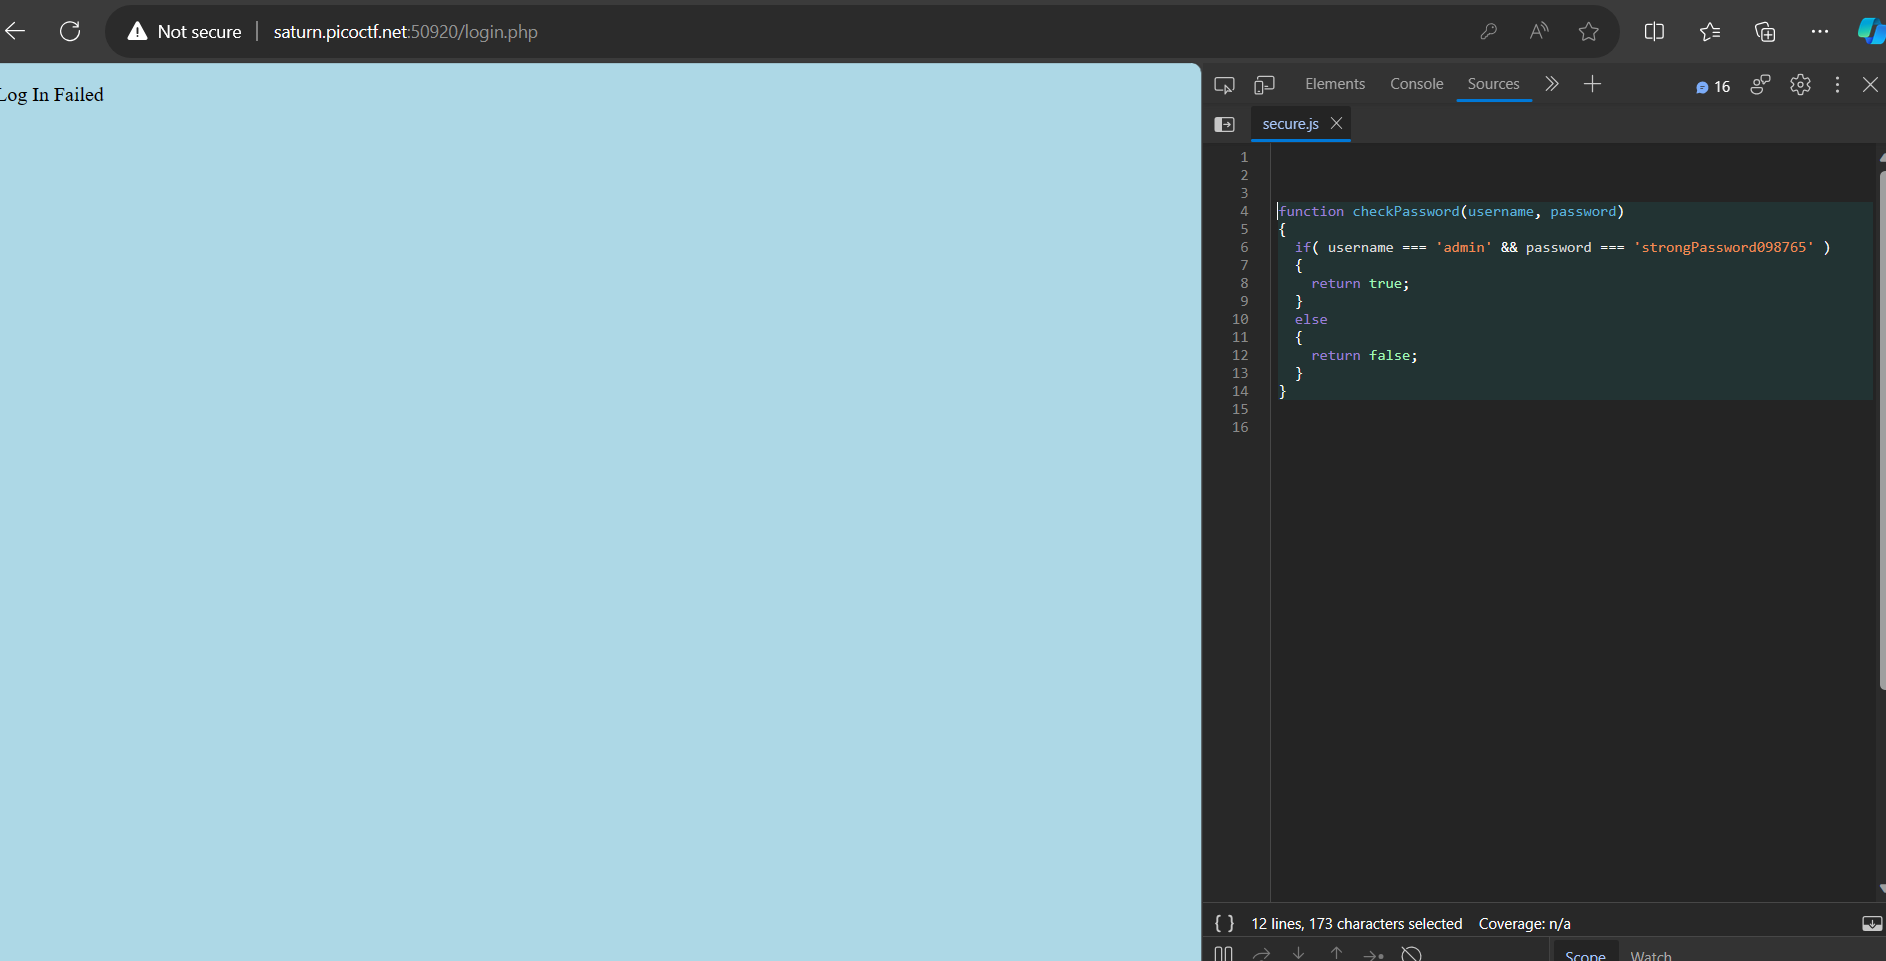

After using the obtained right credentials to log in, you go back to the initial home page, input the admin credentials and obtain the flag within the admin.php site: 
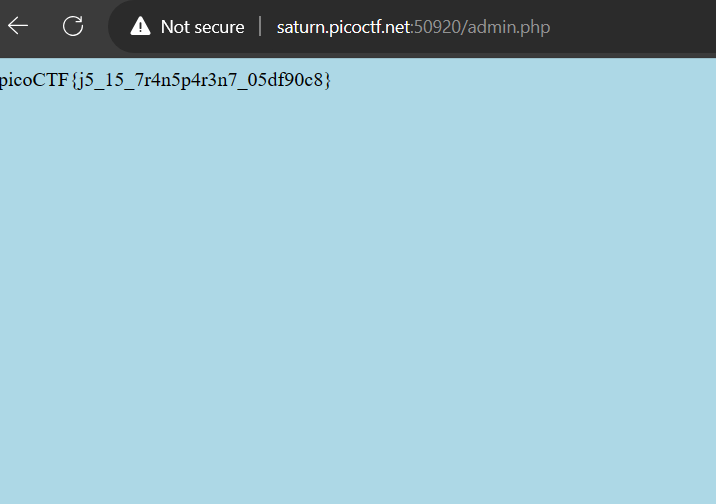

## It is my birthday

We're redirected to a page. We're led to believe through the text that an MD5 Hash collision will make something happen. Therefore we investigate and obtain programms that create a similar sum at the end but with different inputs (collision) using the md5 hash function. Both twin programs (hello and erase) are uploaded to the plattform as pdf and then the we obtain the flag. 

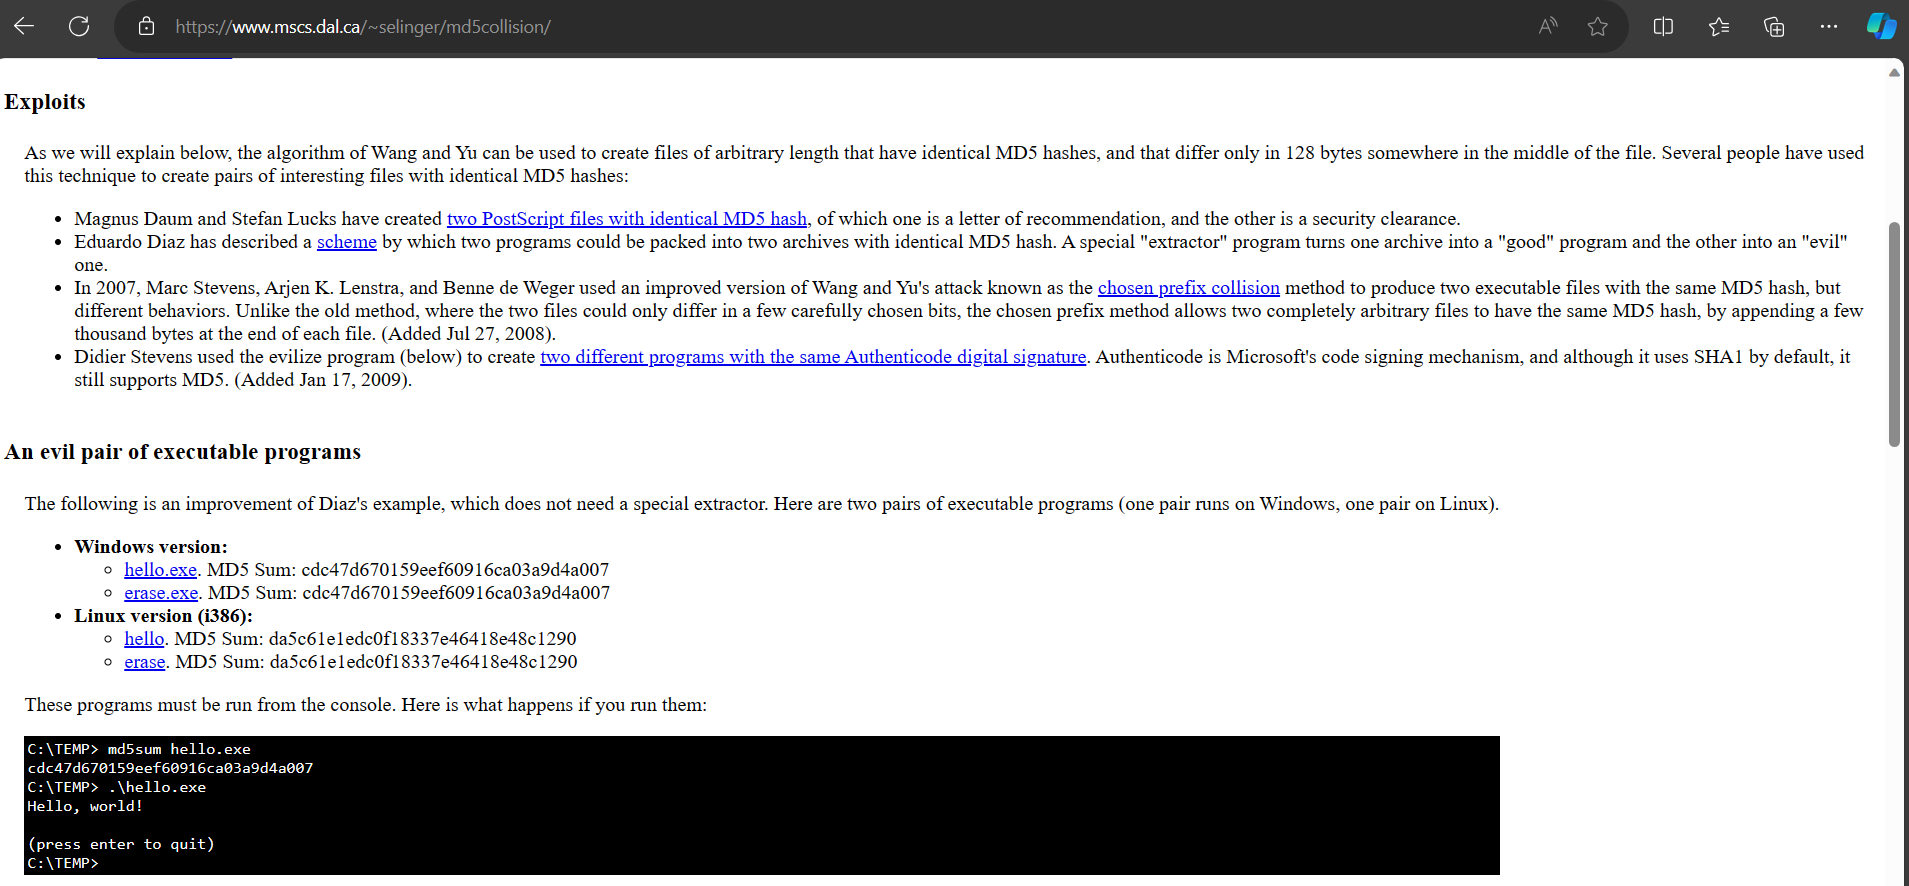

We obtain the programs from the folowing link: https://www.mscs.dal.ca/~selinger/md5collision/ . We change the extension from exe to pdf and then upload the files and finally we obtain the flag:
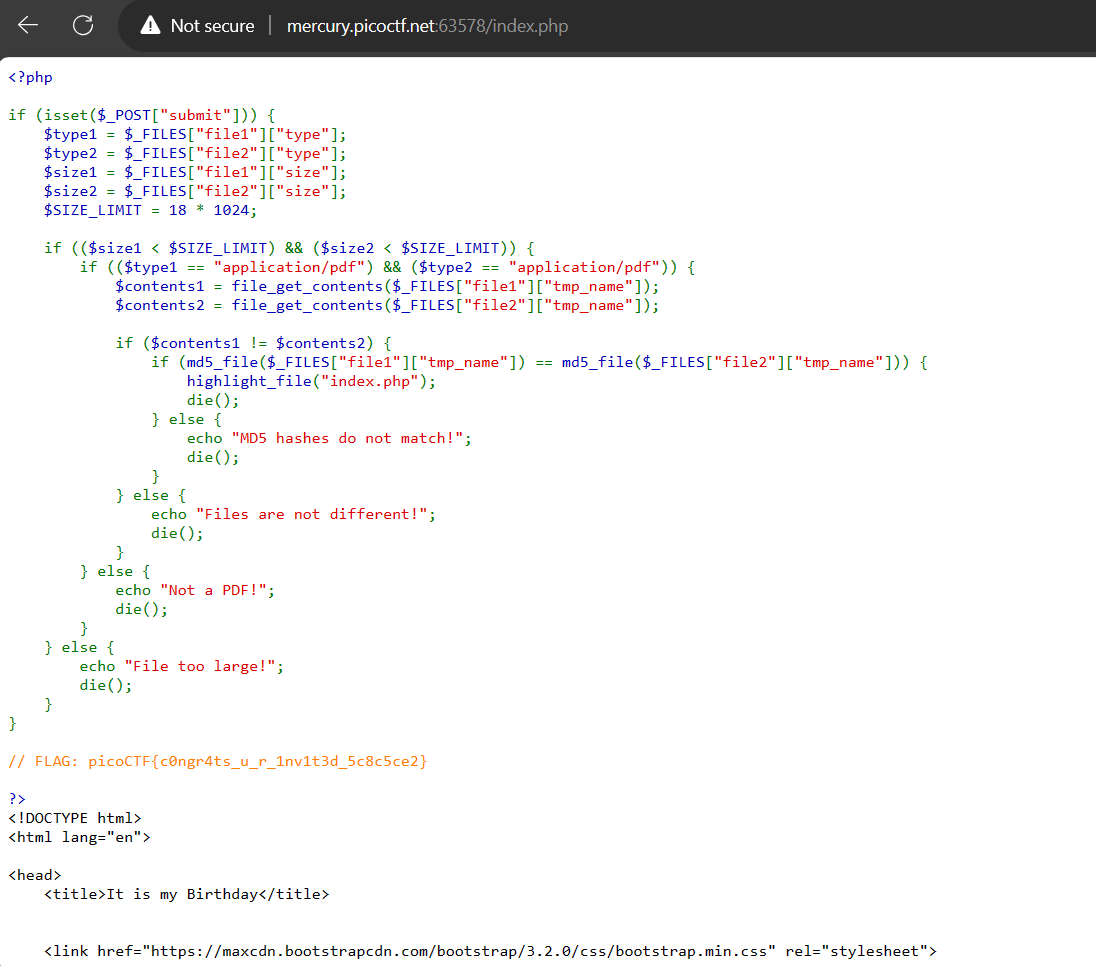

## login

We inspect every item of the site, which is not very useful until we find the index.js file, which contains a function that might be a clue to the username and password. We also find that the username and password are written in base 64 due to the following line: t[e] = btoa(document.querySelector(r[e]).value).replace(/=/g, ""); This means that encoded = will be replaced with whitespaces, someething common in base64, which we know is used as a method in base64 in order to have multiples of 4 
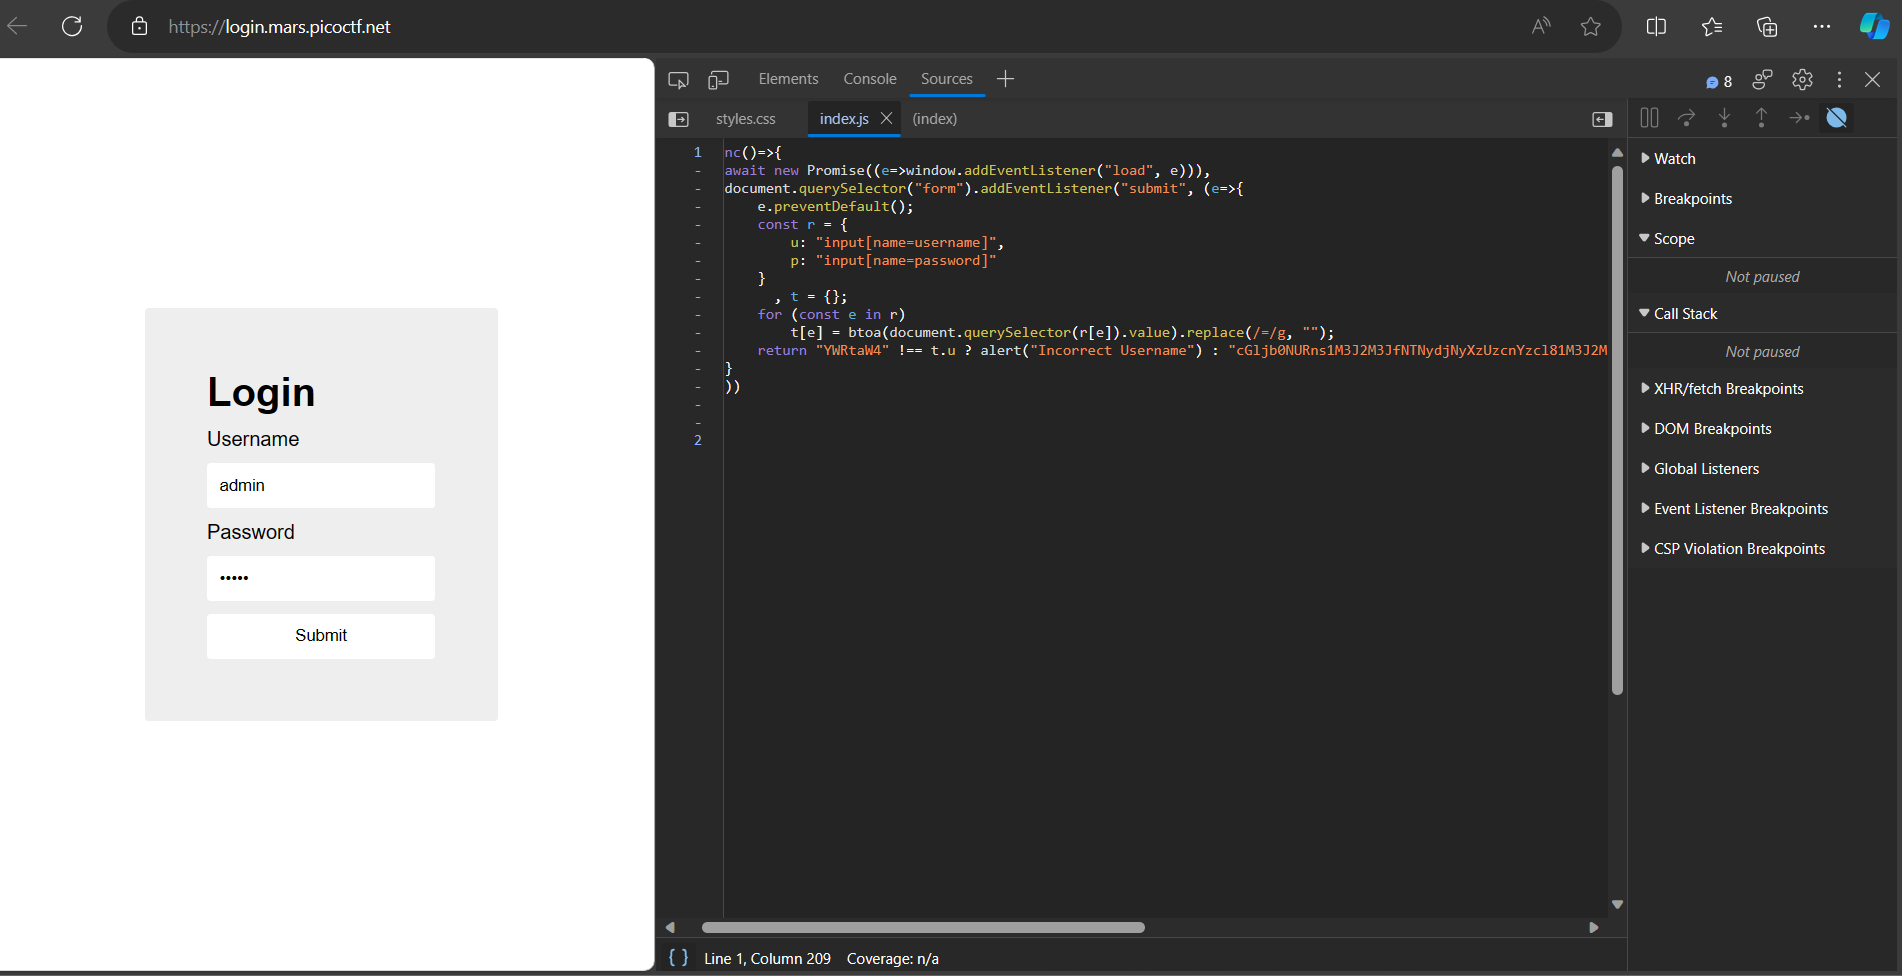

We decode both username and password with the code used earlier, we just add padding in case the length of the text is not equals to a multiple of 4 and obtain the following username and password:

In [9]:
import base64

def decode_base64(encoded_text):
    try:
        # Add padding if needed
        while len(encoded_text) % 4 != 0:
            encoded_text += '='

        # Decoding the Base64-encoded string
        decoded_bytes = base64.b64decode(encoded_text)     
        # Converting the bytes to a UTF-8 encoded string
        decoded_text = decoded_bytes.decode('utf-8')
        
        return decoded_text
    except Exception as e:
        return f"Error decoding Base64: {e}"

# Example usage
encoded_text = "YWRtaW4"
encoded_text_2 = "cGljb0NURns1M3J2M3JfNTNydjNyXzUzcnYzcl81M3J2M3JfNTNydjNyfQ"
decoded_text = decode_base64(encoded_text)
decoded_text_2 = decode_base64(encoded_text_2)

print(f"Encoded Username: {encoded_text}")
print(f"Decoded Text: {decoded_text}")
print(f"Encoded Password: {encoded_text_2}")
print(f"Decoded Password: {decoded_text_2}")

Encoded Username: YWRtaW4
Decoded Text: admin
Encoded Password: cGljb0NURns1M3J2M3JfNTNydjNyXzUzcnYzcl81M3J2M3JfNTNydjNyfQ
Decoded Password: picoCTF{53rv3r_53rv3r_53rv3r_53rv3r_53rv3r}


We finally input the username and the password and obtain the flag. Which is the same ass the password.

## Search Source

We need to throughly search the site, which has many files. We can mirror the website or we can simply use the powerful devtools provided by Edge. I simply use search in Edge, which searches thoroughly the code. I search pico in order to find the flag and I obtain the flag.
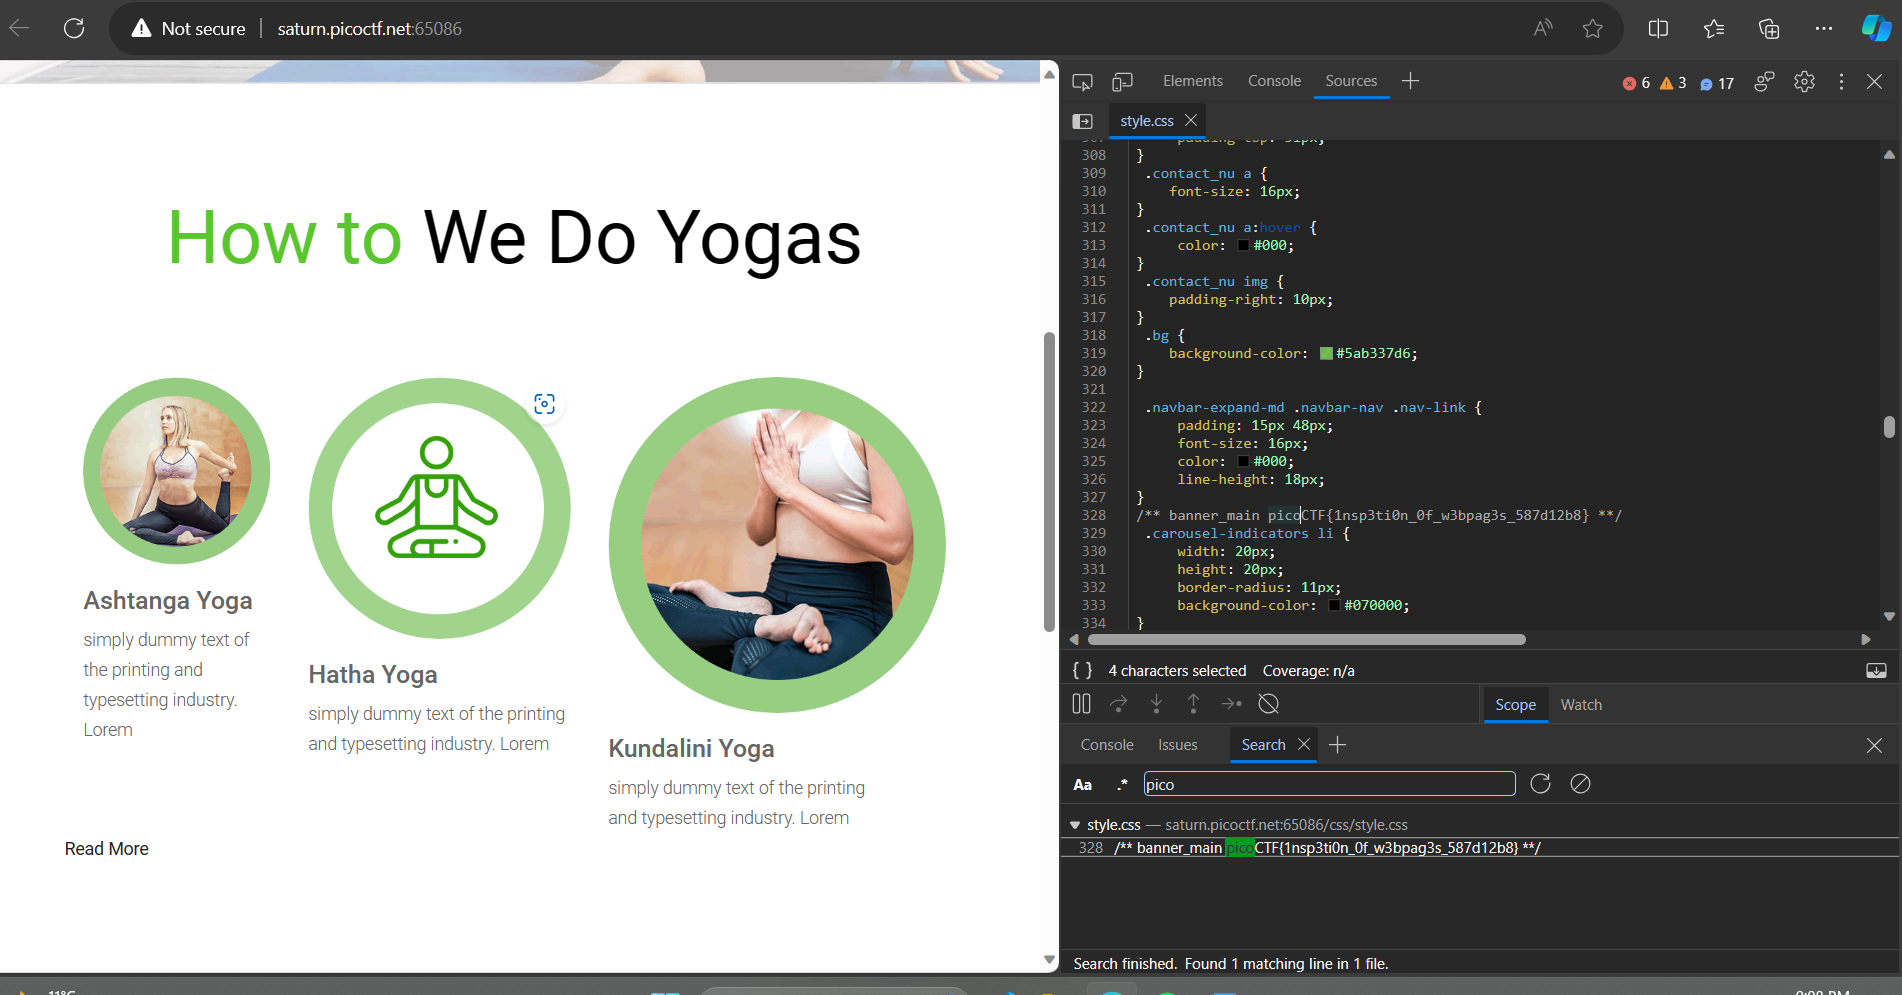

## Where are the robots

The title gives away the fact that we should use the robots.txt URL as we did in a previous exercise in order to obtain a part of the key. Robots.txt avoids web crawling and google indexing. After using the URL, we get the following information: 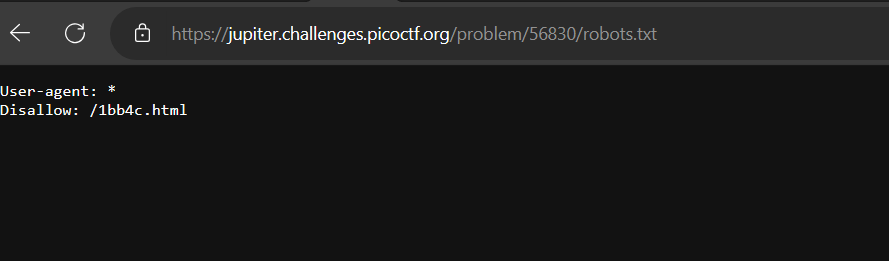

We use the given disallow url and replace it again and obtain the flag:
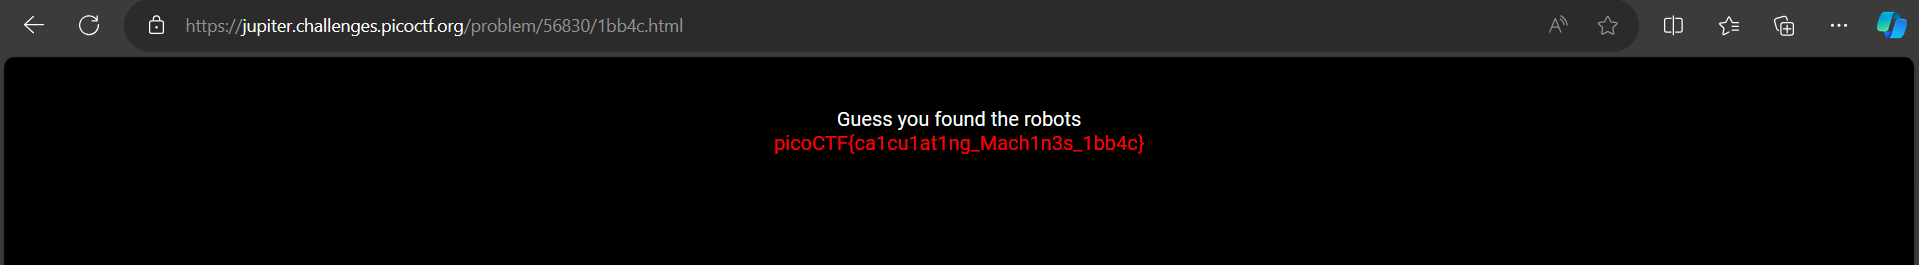

## logon

After using any email to login we try to find which cookies are use, due to being kept the same value over and over once. We see that the admin cookie has a false value, this is done through the application tab on devtools. We change the value from the admin cookie and then we obtain the flag:
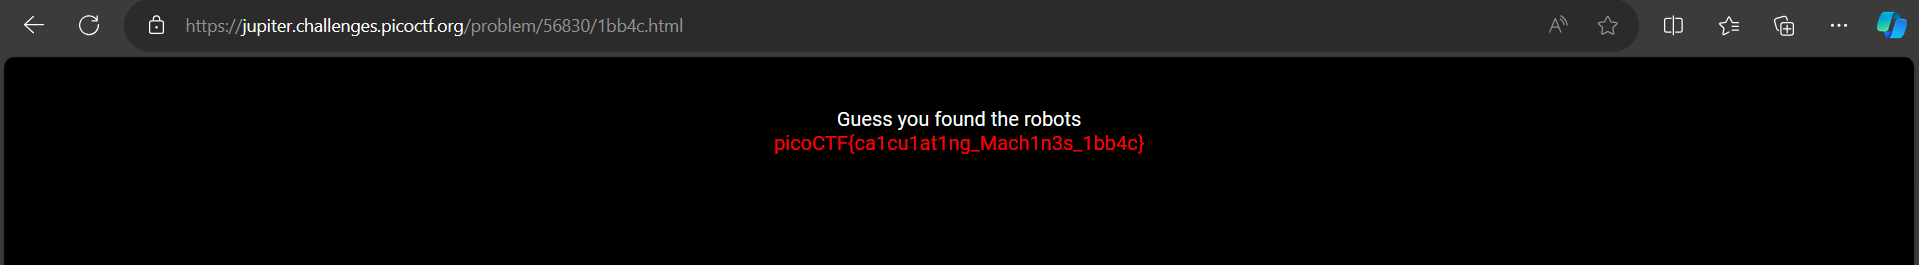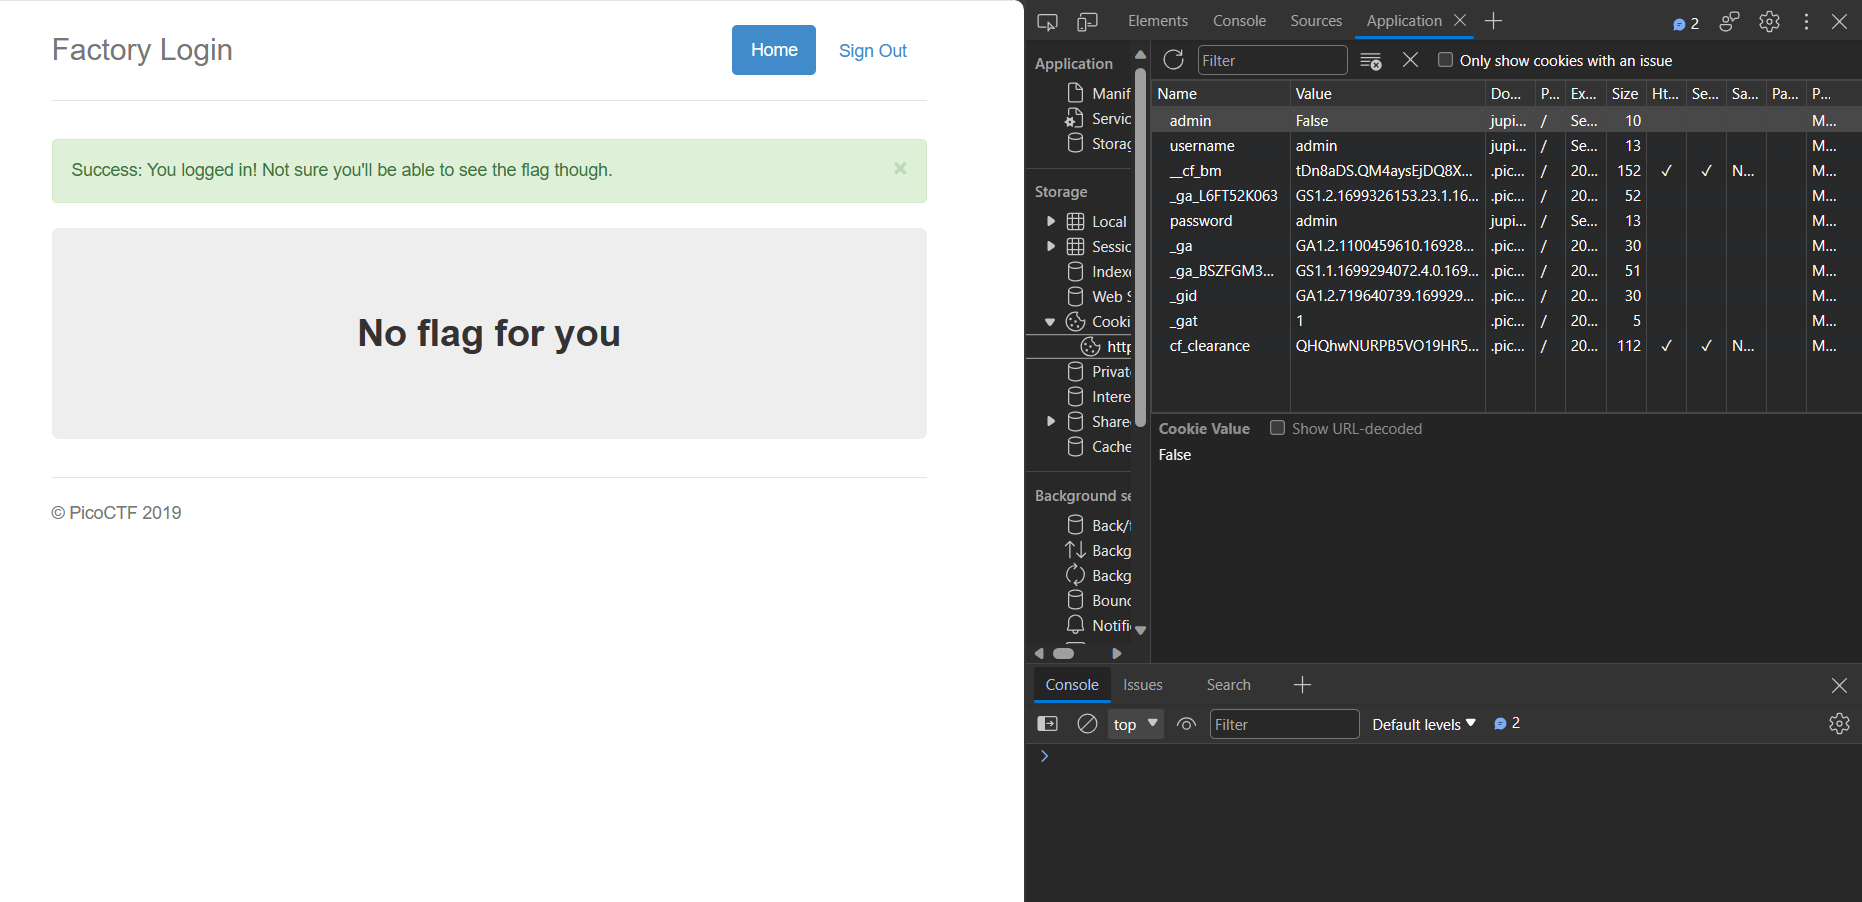

We reload the page and obtain the flag:
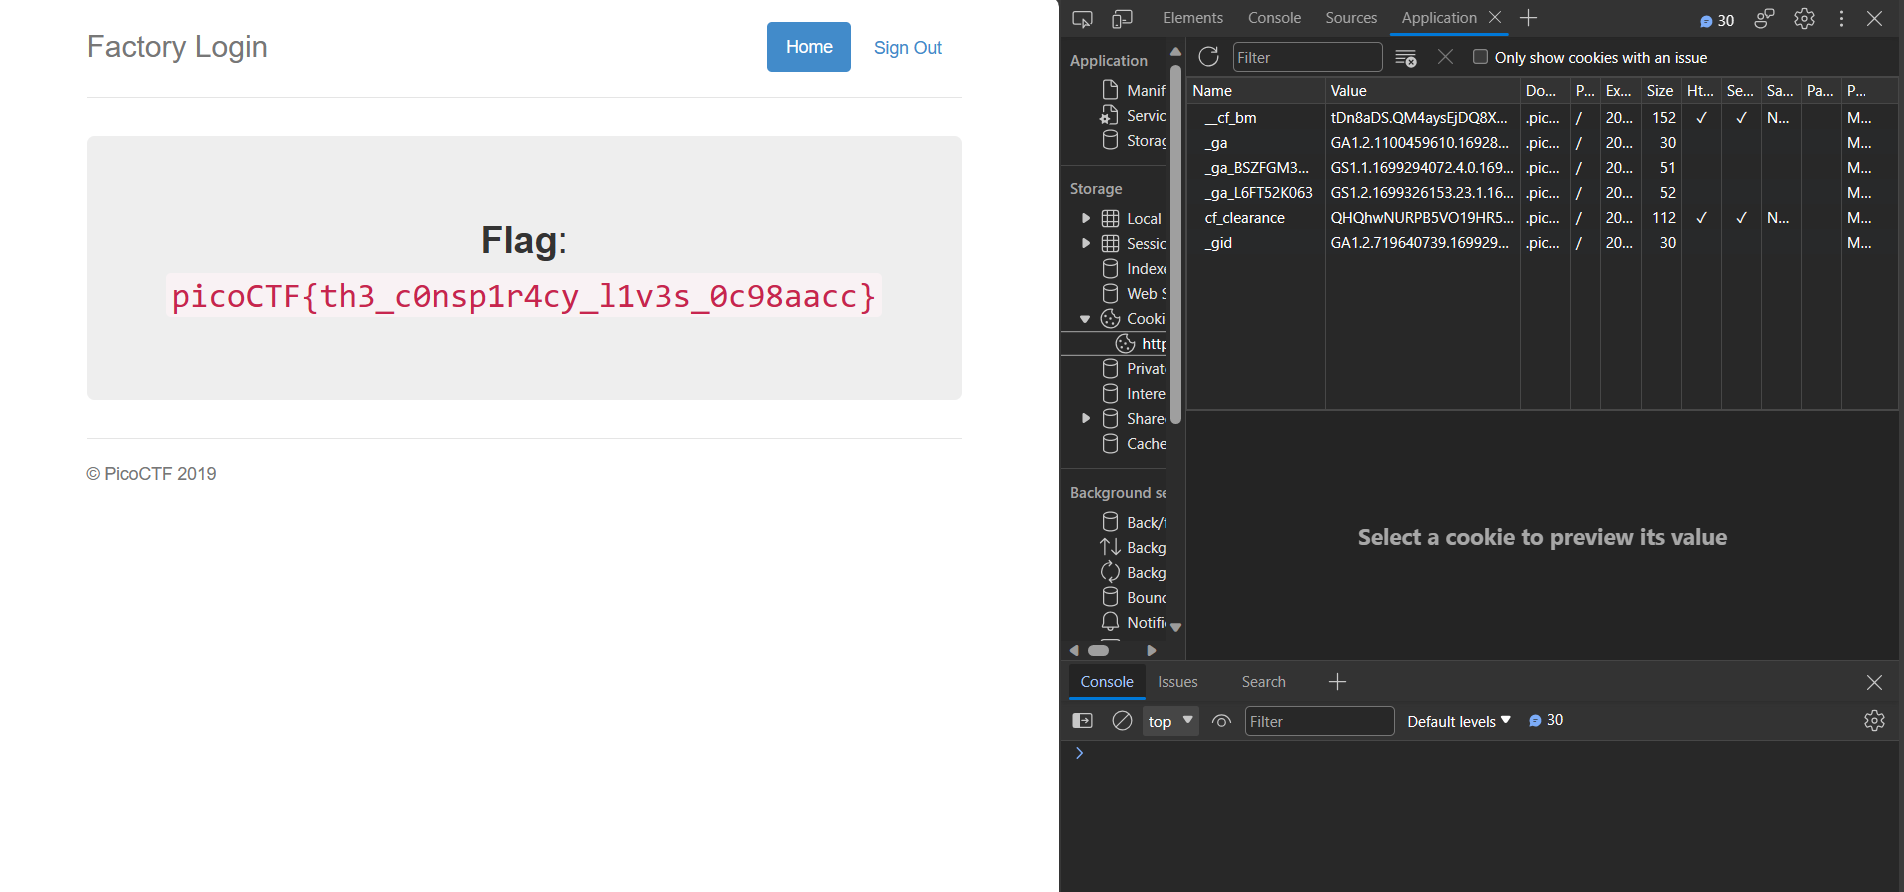